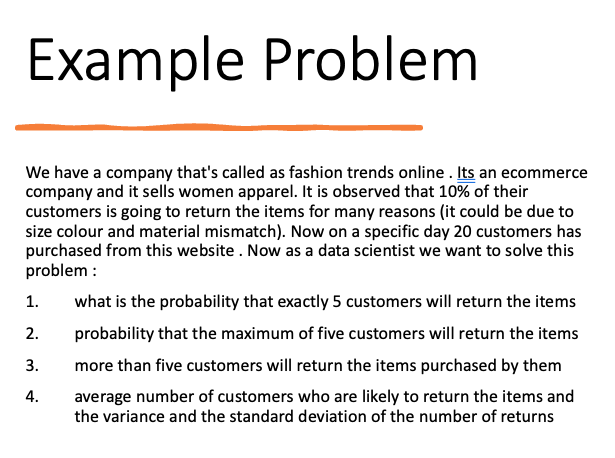

In [1]:
success_trials = 5
total_trials = 20
prob_of_success = 0.1

from scipy import stats
stats.binom.pmf(success_trials,total_trials,prob_of_success)

0.031921361119954424

In [3]:
stats.binom.pmf(success_trials,total_trials,prob_of_success) * 100 # 1st problem

3.1921361119954423

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

pmf_df = pd.DataFrame({"success": range(0,21),
                       "pmf": list(stats.binom.pmf(range(0,21),20,0.1))})
pmf_df

,success,pmf
0,0,1.215767e-01
1,1,2.701703e-01
2,2,2.851798e-01
3,3,1.901199e-01
4,4,8.977883e-02
5,5,3.192136e-02
6,6,8.867045e-03
7,7,1.970454e-03
8,8,3.557765e-04
9,9,5.270763e-05


<Axes: xlabel='success', ylabel='pmf'>

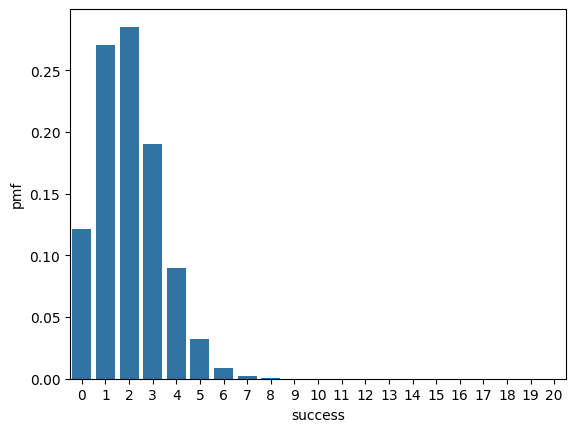

In [7]:
sns.barplot(x="success", y="pmf", data=pmf_df)

In [8]:
# 2nd Question
stats.binom.cdf(success_trials,total_trials,prob_of_success)

0.988746865835491

In [10]:
pmf_df[:6]["pmf"].sum() # cdf

0.988746865835491

In [11]:
1 - stats.binom.cdf(success_trials,total_trials,prob_of_success) # probability that more than 5 customers to return

0.011253134164509015

In [13]:
# average = n*p
20*.1

2.0

In [14]:
# variance = n*p*(1-p)
20*.1*.9

1.8

In [15]:
mean, var = stats.binom.stats(20,0.1)
print(mean, var)

2.0 1.8


In [16]:
round(pmf_df["pmf"],3)

0     0.122
1     0.270
2     0.285
3     0.190
4     0.090
5     0.032
6     0.009
7     0.002
8     0.000
9     0.000
10    0.000
11    0.000
12    0.000
13    0.000
14    0.000
15    0.000
16    0.000
17    0.000
18    0.000
19    0.000
20    0.000
Name: pmf, dtype: float64

# Poisson Distribution:
- Number of calls that arrive in a call center follows Poisson Distribution - 10 calls per hour

- Calculate the prob that - number of calls will be at max 5
- calculate the prob that number of calls over 3 hour period will exceed 30

In [17]:
stats.poisson.cdf(5,10)

0.06708596287903189

In [18]:
# average call per hour = 10
# in 3 hours --> 30 hours
1 - stats.poisson.cdf(30,10*3)

0.45164848742208863

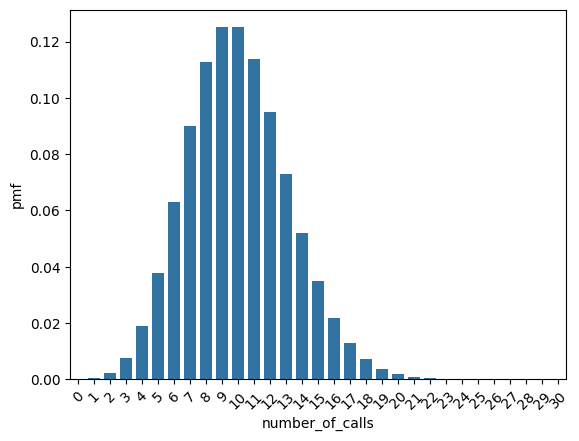

In [22]:
import matplotlib.pyplot as plt
pmf_df = pd.DataFrame({"number_of_calls": range(0,31),
                       "pmf": list(stats.poisson.pmf(range(0,31),10))})
sns.barplot(x="number_of_calls", y="pmf", data=pmf_df)
plt.xticks(rotation=45)
plt.show()

# Normal Distribution example

In [23]:
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/BEML.csv
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/GLAXO.csv

--2024-07-07 16:37:12--  https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/BEML.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103983 (102K) [text/plain]
Saving to: ‘BEML.csv’

BEML.csv            100%[===================>] 101.55K  --.-KB/s    in 0.02s   

2024-07-07 16:37:12 (4.30 MB/s) - ‘BEML.csv’ saved [103983/103983]

--2024-07-07 16:37:12--  https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/GLAXO.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.

In [24]:
import pandas as pd
beml_df = pd.read_csv("BEML.csv")
beml_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [25]:
glaxo_df = pd.read_csv("GLAXO.csv")
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [26]:
beml_df = beml_df[["Date","Close"]]
glaxo_df = glaxo_df[["Date","Close"]]

In [27]:
beml_df.head()

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05


In [28]:
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df["Date"]))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df["Date"]))

In [29]:
glaxo_df.head()

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80


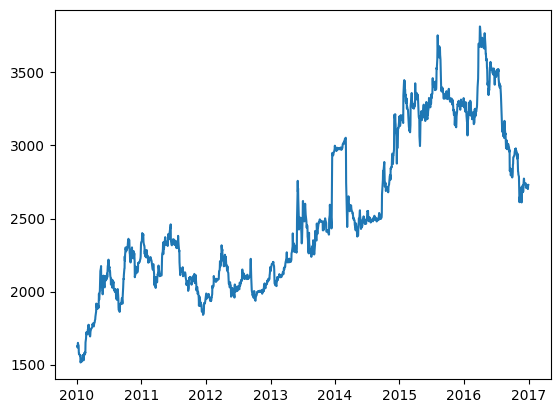

In [30]:
plt.plot(glaxo_df["Close"])
plt.show()

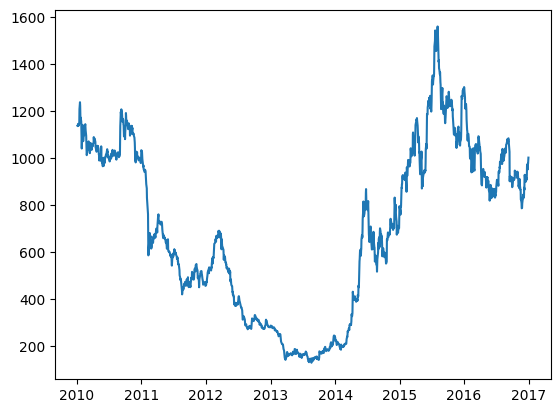

In [31]:
plt.plot(beml_df["Close"])
plt.show()

In [32]:
# What is the expected daily rate of return for these stocks ?
# gain = closeprice(i) - closeprice(i-1)/closeprice(i-1)
beml_df["gain"] = beml_df["Close"].pct_change(1)
glaxo_df["gain"] = glaxo_df["Close"].pct_change(1)
glaxo_df.head()

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398


In [33]:
beml_df.head()

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1135.60,NaN
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087


In [34]:
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

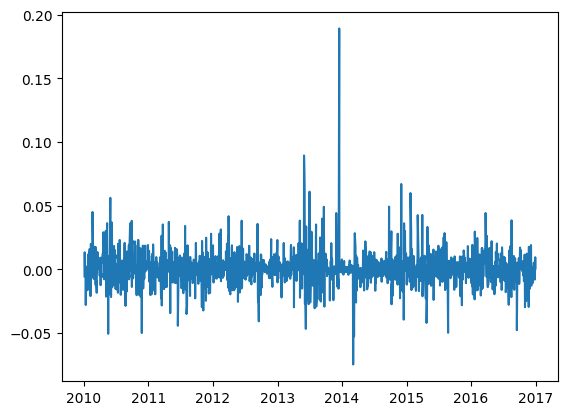

In [35]:
plt.plot(glaxo_df["gain"])
plt.show()

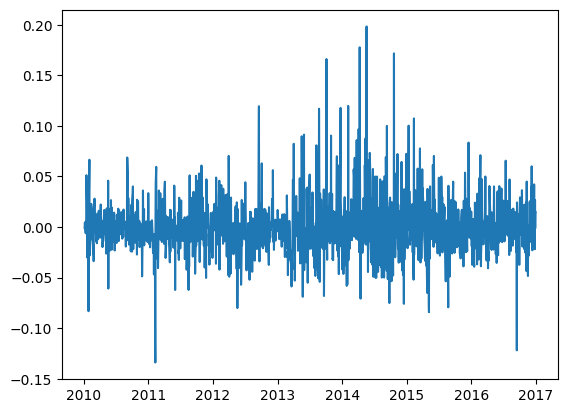

In [36]:
plt.plot(beml_df["gain"])
plt.show()

<ipython-input-37-e257b4b7e201>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(glaxo_df["gain"], label="GLAXO")
<ipython-input-37-e257b4b7e201>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(beml_df["gain"], label="BEML")


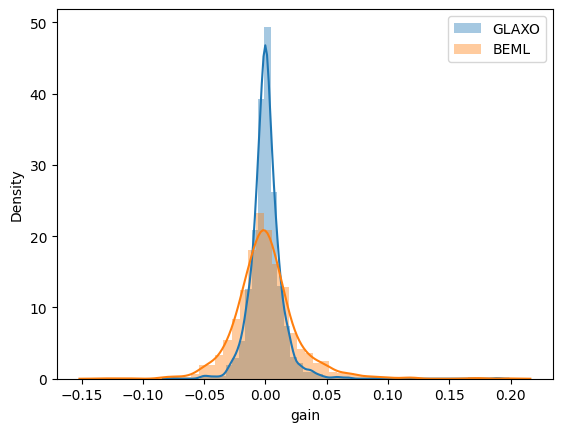

In [37]:
sns.distplot(glaxo_df["gain"], label="GLAXO")
sns.distplot(beml_df["gain"], label="BEML")
plt.legend()
plt.show()

- Expected Daily Returns of the stock
- Which stock has high risk or volatility
- What is the expected range of return for 95% confidence interval
- Which stock has higher probability of making a daily return of 2% or more
- which stock has higher probability of making a loss of 2% or more

In [38]:
beml_df["gain"].std()

0.026430831468474872

In [39]:
glaxo_df["gain"].std()

0.013360538552253337

In [40]:
glaxo_df_ci = stats.norm.interval(0.95, loc=glaxo_df["gain"].mean(), scale=glaxo_df["gain"].std())
glaxo_df_ci

(-0.025800133293883164, 0.026572215459067745)

In [41]:
beml_df_ci = stats.norm.interval(0.95, loc=beml_df["gain"].mean(), scale=beml_df["gain"].std())
beml_df_ci

(-0.05153272968060142, 0.05207422583871589)

In [42]:
# 2 % or more than 2% gain
1 - stats.norm.cdf(0.02, loc=glaxo_df["gain"].mean(), scale=glaxo_df["gain"].std())

0.07104511457618568

In [43]:
1 - stats.norm.cdf(0.02, loc=beml_df["gain"].mean(), scale=beml_df["gain"].std())

0.22769829484075355

In [45]:
# 2 % loss or more than 2% loss
stats.norm.cdf(-0.02, loc=glaxo_df["gain"].mean(), scale=glaxo_df["gain"].std())

0.06352488667177401

In [46]:
stats.norm.cdf(-0.02, loc=beml_df["gain"].mean(), scale=beml_df["gain"].std())

0.22155987503755292

In [44]:
-0.02 > -0.05

True